# Evaluating Environmental Predictors of Breeding Waterfowl Population Distribution and Abundance in the Central Interior Plateau of British Columbia 

## Adventures in Population Modeling and Machine Learning
![image](./images/overview_survey_area_extent.png)


### Overview - General Steps
1. Question - Model species distributions and abundance by establishing a GIS workflow to:
    * Evaluate potential drivers
    * Investigate modeling tools and techniques 
    * Model predictions
    * Inform conservation planning
2. Data exploration and data wrangling
3. Identify analysis methods and tools
4. Perform analysis
5. Examine and refine


<a href="https://community.esri.com/groups/esri-training/blog/2018/10/19/use-the-five-step-gis-analysis-process"> <font size = -2>Modified from ESRI 5-Step GIS Analysis Process</font></a>


### Survey Background
##### Waterfowl Breeding Population and Habitat Survey
![image](./images/wbphs_na.png)
“The breeding waterfowl survey is arguably the largest and best-designed population survey in the world, involving census of over 2.2 million km2 of core waterfowl breeding habitat.” 

– Murray et al, 2010 (Ecology, 91(2))

* Waterfowl Population Status Reports - hunting regulations, MBCA
    * Continental scale, conducted on an annual basis since 1955
    * Habitat assessment via pond counts
    * Fixed wing, visibility correction factor with ground crews
    * Transects designed within high and low density quadrats

* BC is a late extension to the Traditional Survey Area, 2006
* Different survey methodology - no pond counts, ecosections not strata, helicopter



### Survey Design
* Aerial survey by helicopter
* E–W strip transects, 400m wide, 10 miles apart
* Early–late May over an average duration ~ 22 days
* Distance – 6,624 km (4,107 mi)
* 8 Ecosections—regions of similar:
    * climate
    * physiography 
    * hydrology
    * vegetation 						
    * wildlife
    
* Total Study Area ~10,714,000 ha (41,000+ sq miles)
* Total Transect Area ~ 265,000 ha (1,000+ sq miles) (~2.5%)
* 2007-17 30,000+ observations


<style type="text/css">
.input_hidden{
    display: none
</style>

<style type="text/css"> # CSS hack to hide the cell input
.input_hidden{
    display: none


Issues tracking:

1. IRKernel loading packages from later version of R (3.5.3 instead of 3.5.1) - must change kernel spec as described here: https://github.com/IRkernel/IRkernel/issues/183


2. jupyterlab extension to close cells * requires installation of nodejs and npm 
    conda install nodejs
    conda install npm 
   
    - required update of pip
    - which required adding forge channel first:
        conda config --add channels conda-forge 
        conda update pip
     now
        conda install nodejs
        conda install npm
     but required update of core-js with 
         npm install --save core-js@^3
     
     then follow: https://jupyter-contrib-nbextensions.readthedocs.io/en/latest/install.html and run
         conda install -c conda-forge jupyter_contrib_nbextensions
     then 
         jupyter contrib nbextension install --sys-prefix # for system wide esp. useful in virtual env
     then enable the path but first list available Jupyter paths 
         jupyter --paths

     Check jupyterlab extensions with 
        jupyter nbextension list
    
    }
</style>


Here is a look at the (semi-processed) survey data--the head and tail views of the data frame.

In [2]:

setwd("C:/Users/hashimotoy/Documents/GitHub/iws")
df <- read.csv("iws_pts_filtered_20190620.csv")

head(df)
tail(df)
records <- nrow(df)
print(paste("Total records: ", records))

date_,year_,month_,day_,lon,lat,species,x_alb,y_alb,sp_name,...,eco,trans_id,Ecosection_2pt1,prev_trans,Ecosection_1995,unknown_BoN_combo,Total_Count,Total_IBP_Formula,Total_Count_Formula,pop
<int>,<int>,<int>,<int>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<fct>,...,<fct>,<int>,<fct>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<int>
39209,2007,5,7,-122.8230,53.30426,CAGO,1211186,926711.1,Canada Goose,...,QUL,16,Quesnel Lowland,B07,Quesnel Lowland,1,1,2* [pair]+ [unknownSex],Total_IBP+ [mixed_m] + [mixed_f],1
39211,2007,5,9,-122.6088,53.01350,AMWI,1226964,894968.8,American Wigeon,...,QUL,14,Quesnel Lowland,B09,Quesnel Lowland,0,9,2*[lone_m] +2* [pair] + 2* [m2]*2 +2* [m3]*3 + 2* [m4]*4,Total_IBP+ [mixed_m] + [mixed_f],6
39211,2007,5,9,-122.6088,53.01350,CAGO,1226964,894968.8,Canada Goose,...,QUL,14,Quesnel Lowland,B09,Quesnel Lowland,1,1,2* [pair]+ [unknownSex],Total_IBP+ [mixed_m] + [mixed_f],1
39211,2007,5,9,-122.6088,53.01350,GWTE,1226964,894968.8,Green-winged Teal,...,QUL,14,Quesnel Lowland,B09,Quesnel Lowland,0,4,2*[lone_m] +2* [pair] + 2* [m2]*2 +2* [m3]*3 + 2* [m4]*4,Total_IBP+ [mixed_m] + [mixed_f],4
39211,2007,5,9,-122.6088,53.01350,MALL,1226964,894968.8,Mallard,...,QUL,14,Quesnel Lowland,B09,Quesnel Lowland,0,6,2*[lone_m] +2* [pair] + 2* [m2]*2 +2* [m3]*3 + 2* [m4]*4,Total_IBP+ [mixed_m] + [mixed_f],0
39223,2007,5,21,-124.4701,54.31847,GWTE,1099279,1036228.4,Green-winged Teal,...,BAU,23,Babine Upland,A10,Babine Upland,0,2,2*[lone_m] +2* [pair] + 2* [m2]*2 +2* [m3]*3 + 2* [m4]*4,Total_IBP+ [mixed_m] + [mixed_f],2


,date_,year_,month_,day_,lon,lat,species,x_alb,y_alb,sp_name,...,eco,trans_id,Ecosection_2pt1,prev_trans,Ecosection_1995,unknown_BoN_combo,Total_Count,Total_IBP_Formula,Total_Count_Formula,pop
,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<fct>,...,<fct>,<int>,<fct>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<int>
32848,42866,2017,5,11,-124.3120,52.14455,GWTE,NA,NA,Green-Winged Teal,...,CHP,8,Chilcotin Plateau,C05,Chilcotin Plateau,0,2,2*[lone_m] +2* [pair] + 2* [m2]*2 +2* [m3]*3 + 2* [m4]*4,Total_IBP+ [mixed_m] + [mixed_f],2
32849,42866,2017,5,11,-124.3104,52.14597,RNDU,NA,NA,Ring-necked Duck,...,CHP,8,Chilcotin Plateau,C05,Chilcotin Plateau,0,1,1 * [lone_m] +2* [pair] + [m2]*2 + [m3]*3 + [m4]*4,Total_IBP+ [mixed_m] + [mixed_f],1
32850,42866,2017,5,11,-124.3804,52.14530,NOSL,NA,NA,Northern Shoveler,...,CHP,8,Chilcotin Plateau,C05,Chilcotin Plateau,0,2,2*[lone_m] +2* [pair] + 2* [m2]*2 +2* [m3]*3 + 2* [m4]*4,Total_IBP+ [mixed_m] + [mixed_f],2
32851,42866,2017,5,11,-124.3804,52.14530,MALL,NA,NA,Mallard,...,CHP,8,Chilcotin Plateau,C05,Chilcotin Plateau,0,2,2*[lone_m] +2* [pair] + 2* [m2]*2 +2* [m3]*3 + 2* [m4]*4,Total_IBP+ [mixed_m] + [mixed_f],2
32852,42866,2017,5,11,-124.3793,52.14648,GWTE,NA,NA,Green-Winged Teal,...,CHP,8,Chilcotin Plateau,C05,Chilcotin Plateau,0,2,2*[lone_m] +2* [pair] + 2* [m2]*2 +2* [m3]*3 + 2* [m4]*4,Total_IBP+ [mixed_m] + [mixed_f],2
32853,42866,2017,5,11,-124.3977,52.14375,MALL,NA,NA,Mallard,...,CHP,8,Chilcotin Plateau,C05,Chilcotin Plateau,0,2,2*[lone_m] +2* [pair] + 2* [m2]*2 +2* [m3]*3 + 2* [m4]*4,Total_IBP+ [mixed_m] + [mixed_f],2


[1] "Total records:  32853"


### Data Exploration - Species Observation Records

In [66]:
# Load the processed data in wide format
library(tidyverse)
iws <- read.csv("C:/Users/hashimotoy/Desktop/ws_prep/rf_400/_inputs/id1_years_0705/id1_years.csv")

# Reshape to long form
df <- gather(iws,"sp_id", "pop", amwi:wodu)
df$sp_id <- toupper(df$sp_id) # Species codes to uppercase


In [104]:
n_sp <- unique(df$sp_id)

sp <- df %>%
    group_by(sp_id) %>%
    summarise(Population = sum(pop))

sp_top_5 <- sp %>%
    arrange(desc(Population))%>%
    top_n(5)

sp_bot_5 <- sp %>%
    arrange(Population)%>%
    top_n(-5)

sp_top_10 <- sp %>%
    arrange(desc(Population))%>%
    top_n(10)


Selecting by Population
Selecting by Population
Selecting by Population


In [65]:
print(paste("Total distinct species of waterfowl : ",length(n_sp)))
print("5 MOST common species:")
sp_top_5
print("5 LEAST common species:") 
sp_bot_5

[1] "Total distinct species of waterfowl :  27"
[1] "5 MOST common species:"


sp_id,Population
<chr>,<int>
MALL,18898
RNDU,11079
BUFF,9672
CAGO,9578
GWTE,7608


[1] "5 LEAST common species:"


sp_id,Population
<chr>,<int>
SWAN,2
HADU,6
SNGO,16
RBME,18
COGO,26


Plot the top 15 most common species.

Selecting by Population


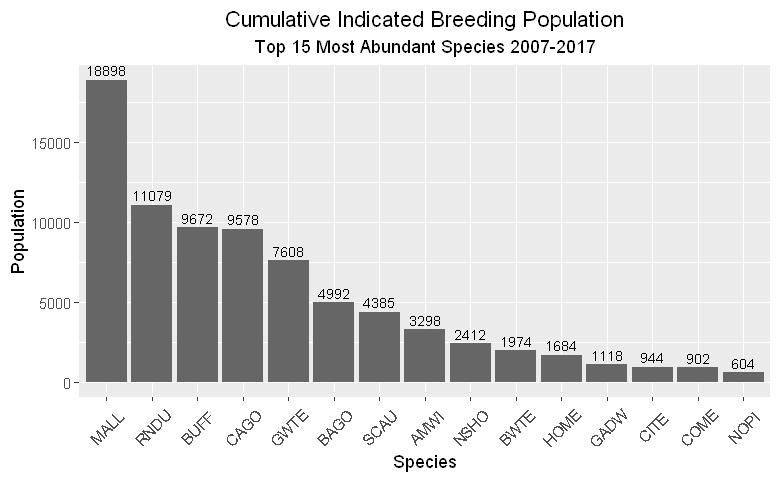

In [68]:
sp <- df %>% 
    group_by(sp_id) %>% 
    summarise(Population = sum(pop)) %>% 
    arrange(desc(Population)) %>% 
    top_n(15)
# sp
p <- ggplot(data = sp, aes(x = reorder(sp_id, -Population), y = Population)) + geom_bar(stat = "identity", 
    fill = "gray40") + ggtitle("Cumulative Indicated Breeding Population", subtitle = "Top 15 Most Abundant Species 2007-2017") + 
    xlab("Species") + geom_text(aes(label = Population), size = 3, hjust = 0.5, vjust = -0.4) + 
    theme(plot.title = element_text(hjust = 0.5), plot.subtitle = element_text(hjust = 0.5), 
        axis.text.x = element_text(angle = 45, vjust = 0.5))
options(repr.plot.width = 6.5, repr.plot.height = 4)
p

What is the distribution of species within ecosections?

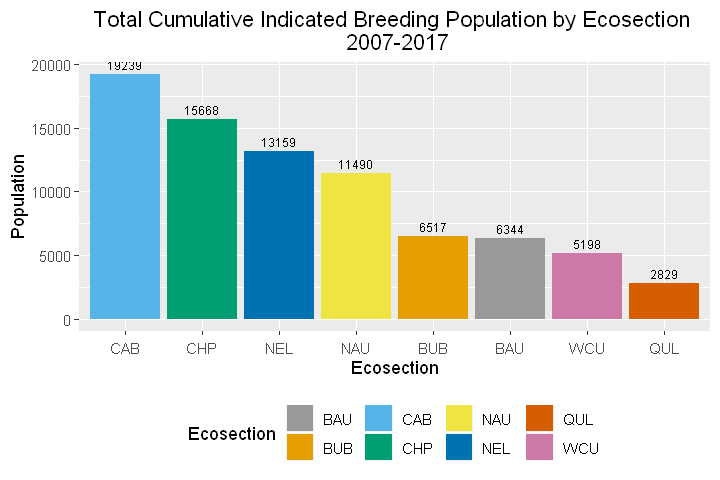

In [70]:
eco_sp <- df %>% 
    group_by(eco) %>% 
    summarise(Population = sum(pop)) %>% 
    arrange(desc(Population))

# Create a custom colour-blind-friendly scale
library(RColorBrewer)
cbp1 <- c("#999999", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", 
    "#CC79A7")
names(cbp1) <- levels(eco_sp$eco)
colFill <- scale_fill_manual(name = "Ecosection", names(cbp1), values = cbp1)
colColour <- scale_colour_manual(name = "Ecosection", names(cbp1), values = cbp1)
shp1 <- c(5, 6, 8, 15:19)
colShape <- scale_shape_manual(name = "Ecosection", names(cbp1), values = shp1)

g <- ggplot(eco_sp, aes(x = reorder(eco, -Population), y = Population, fill = eco)) + 
    geom_bar(stat = "identity") + ggtitle("Total Cumulative Indicated Breeding Population by Ecosection \n 2007-2017") + 
    xlab("Ecosection") + labs(color = "Ecosection") + colFill + geom_text(aes(label = Population), 
    size = 2.5, hjust = 0.5, vjust = -0.5) + theme(axis.text.x = element_text(angle = 0, 
    vjust = 0.5), plot.title = element_text(hjust = 0.5), legend.position = "bottom")
options(repr.plot.width = 6, repr.plot.height = 4)
g



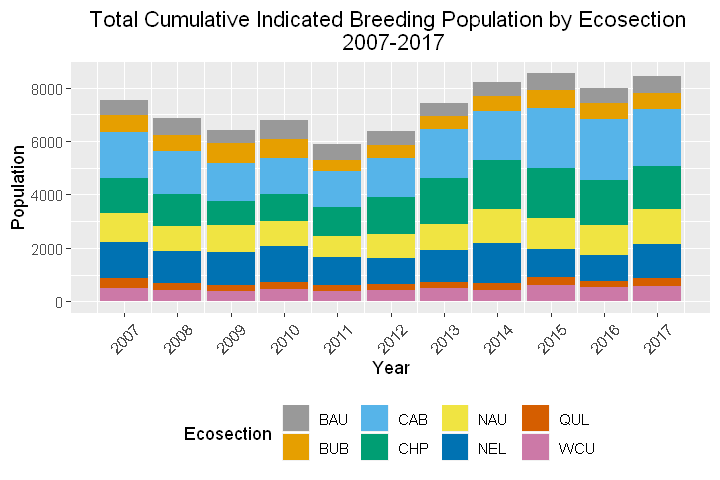

In [71]:
# Group by Ecosection and Year

eco_sp_yr <- df %>% 
    group_by(eco, year_) %>% 
    summarise(Population = sum(pop)) %>% 
    arrange(desc(Population))
g <- ggplot(eco_sp_yr, aes(x = year_, y = Population, fill = eco)) + 
    geom_bar(stat = "identity") + ggtitle("Total Cumulative Indicated Breeding Population by Ecosection \n 2007-2017") + 
    xlab("Year") + labs(color = "Ecosection") + colFill + theme(axis.text.x = element_text(angle = 45, 
    vjust = 0.5), plot.title = element_text(hjust = 0.5), legend.position = "bottom")
options(repr.plot.width = 6, repr.plot.height = 4)
g + scale_x_continuous(breaks = c(2007: 2017))


`geom_smooth()` using method = 'loess' and formula 'y ~ x'


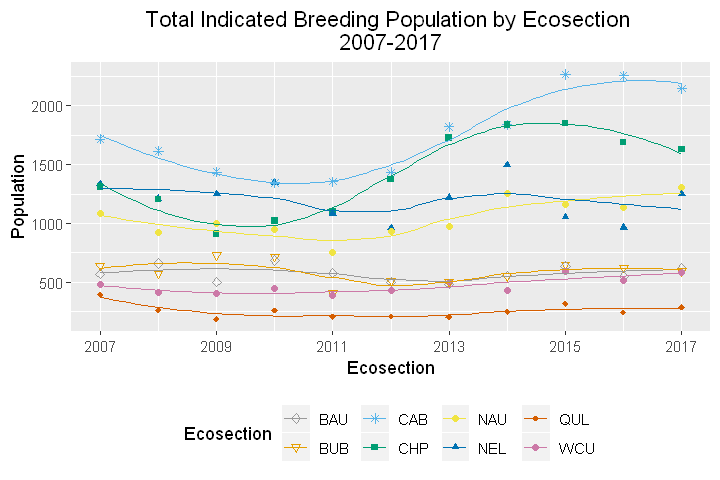

In [72]:
# Total indicated breeding population by Ecosection and Year

eco_sp_yr <- df %>% 
    group_by(eco, year_) %>% 
    summarise(Population = sum(pop)) %>% 
    arrange(desc(Population))
g <- ggplot(eco_sp_yr, aes(x = year_, y = Population, colour = eco, shape = eco)) + 
    geom_point() + colShape + colColour + 
    ggtitle("Total Indicated Breeding Population by Ecosection \n2007-2017") + 
    xlab("Ecosection") + labs(color = "Ecosection") + 
    scale_x_continuous(breaks = c(2007, 2009, 2011, 2013, 2015, 2017))
options(repr.plot.width = 6, repr.plot.height = 4)
g +  geom_smooth(size = 0.5, se = F) + theme(axis.text.x = element_text(hjust = 0.5),  
          plot.title = element_text(hjust = 0.5),
          legend.position = "bottom", legend.direction = "horizontal", 
        plot.subtitle = element_text(hjust = 0.5))


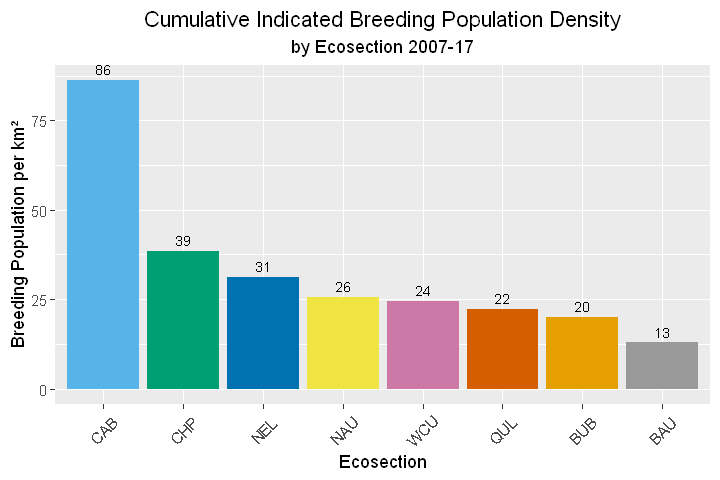

In [73]:
eco_area <- read.csv("eco_transect_area_summary.csv")
eco_p <- merge(eco_sp, eco_area)
eco_p$p_density <- eco_p$Population/eco_p$area_surveyed*100

g <- ggplot(eco_p, aes(x=reorder(eco, -p_density),y=p_density, fill=eco)) + geom_bar(stat="identity") + 

    ggtitle(label="Cumulative Indicated Breeding Population Density", subtitle="by Ecosection 2007-17") + colFill +
    geom_text(aes(label=round(p_density, digits=0)), size=3, hjust=0.5, vjust=-0.5) +
    xlab("Ecosection") + ylab("Breeding Population per km²") + 
    theme(axis.text.x = element_text(angle=45,vjust=.5), 
        plot.title = element_text(hjust=0.5),
        plot.subtitle = element_text(hjust=0.5), 
        legend.position = "none")
options(repr.plot.width=6,repr.plot.height=4)
g


The Cariboo Basin (CAB) is clearly a very important Ecosection for breeding waterfowl populations especially when taking the Ecosection area into account as visualized by population density. How does the population density vary through time?

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


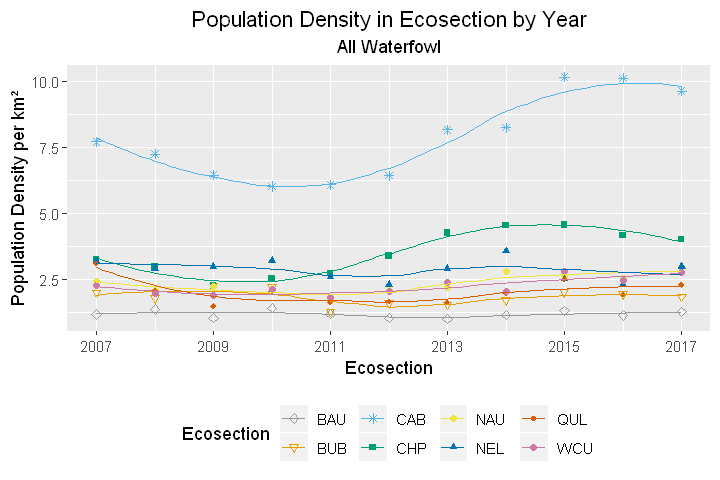

In [74]:
eco_yr <- df %>% 
    group_by(eco, year_) %>% 
    summarise(pop = sum(pop)) %>% 
    left_join(., eco_area, by = "eco") %>% 
    mutate(density = pop/area_surveyed * 100)

# #Plot the outcome
g <- ggplot(eco_yr, aes(year_, density, colour = eco, shape = eco)) + ggtitle("Population Density in Ecosection by Year", 
    subtitle = "All Waterfowl") + geom_point() + colShape + 
    colColour + theme(legend.position = "bottom", legend.direction = "horizontal", 
    legend.box = "vertical", axis.text.x = element_text(hjust = 0.5), plot.title = element_text(hjust = 0.5), 
    plot.subtitle = element_text(hjust = 0.5)) + xlab("Ecosection") + ylab("Population Density per km²") + 
    scale_x_continuous(breaks = c(2007, 2009, 2011, 2013, 2015, 2017))
options(repr.plot.width = 6, repr.plot.height = 4)
g + geom_smooth(size = 0.5, se = F)

## PLACEHOLDER FOR DISCUSSION OF POPULATION TRENDS. 
The central and northernmost ecosections in the study area Babine Upland, Western Chilcotin Upland, Nazko Upland, Quesnel Lowland and Nechako Lowland have the most stable populations with only slight fluctuations year to year--the lattermost fluctuating more than the others. In constrast, the southernmost neighbours, Cariboo Basin and Chilcotin Plateau, mirror year to year concordant while sharing moderately increasing trends over the study period. The population trend in Nechako Lowland remained relatively stable over the study period,but minor fluctuations were discordant with trends in the Cariboo Basin and Chilocotin Plateau with the exception of years 2012 to 2014 when populations within these ecosections each increased.



# Top 10 Species only
sp_10 <- factor(sp_top_10$sp_id) # Unless factor original 31 levels are retained
sp_10_yr <- df %>% 
    filter(sp_id %in% sp_10) %>%
a    group_by(eco, year_) %>% 
    summarise(pop = sum(pop)) %>% 
    left_join(., eco_area, by = "eco") %>% 
    mutate(density = pop/area_surveyed*100)

# #Plot the outcome
h <- ggplot(sp_10_yr, aes(year_, density, colour = eco, shape = eco)) + ggtitle("Population Density in Ecosection by Year", 
    subtitle = "Top 10 Most Abundant Waterfowl Species") + geom_point() + colShape + 
    colColour + theme(legend.position = "bottom", legend.direction = "horizontal", 
    legend.box = "vertical", axis.text.x = element_text(hjust = 0.5), plot.title = element_text(hjust = 0.5), 
    plot.subtitle = element_text(hjust = 0.5)) + xlab("Ecosection") + ylab("Total Breeding Population Density per km²") + 
    scale_x_continuous(breaks = c(2007, 2009, 2011, 2013, 2015, 2017))
options(repr.plot.width = 6, repr.plot.height = 4)
h + geom_smooth(method = "auto", size = 0.5, se = F)


`geom_smooth()` using method = 'loess' and formula 'y ~ x'


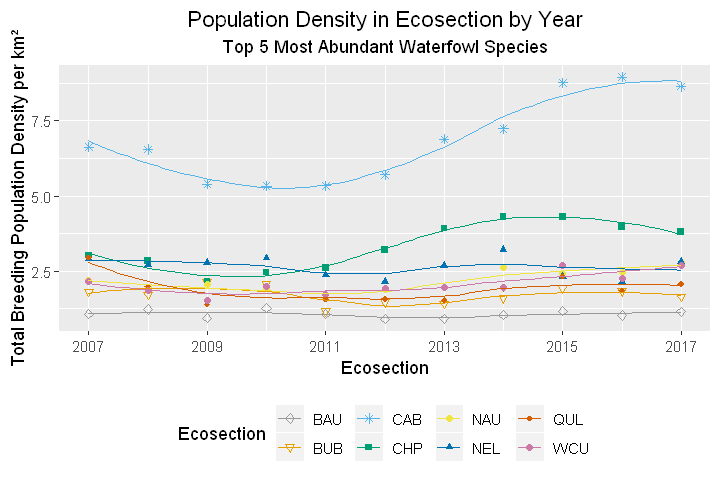

Visualize and compare distributions of the top most common species

In [111]:
# Top 5 Species only


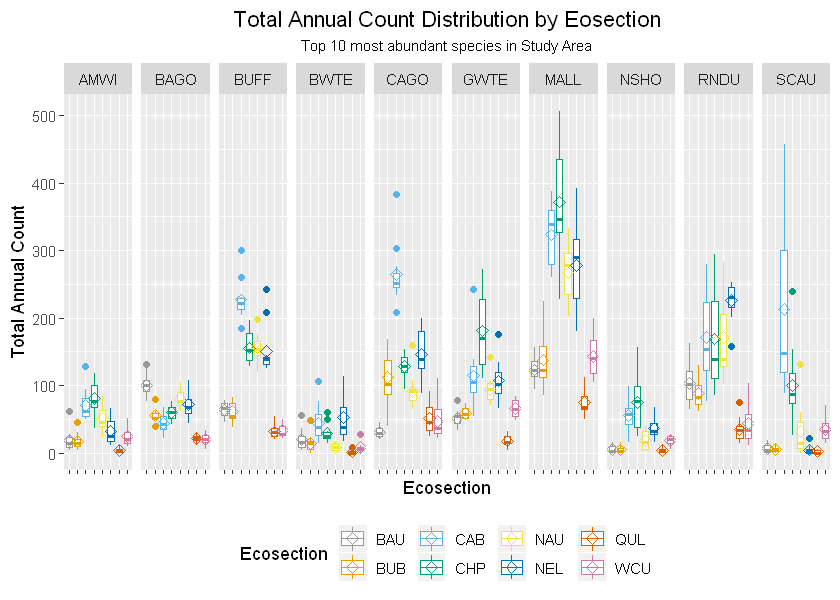

In [86]:
# Total Abundance 

bp <- ggplot(eco_sp_yr, aes(x = eco, y = Population, colour = eco)) + geom_boxplot() + 
    colColour + ggtitle(label = "Total Annual Count Distribution by Eosection", subtitle = "Top 10 most abundant species in Study Area") + 
    theme(legend.position = "bottom", legend.direction = "horizontal", legend.box = "vertical", 
        axis.text.x = element_blank(), plot.title = element_text(hjust = 0.5), plot.subtitle = element_text(hjust = 0.5, 
            size = 9)) + ylab("Total Annual Count") + xlab("Ecosection") + 
    stat_summary(fun.y = mean, geom = "point", shape = 5, size = 2)  # Add means

options(repr.plot.width = 7, repr.plot.height = 5)
bp + facet_wrap(. ~ sp_id, ncol = 13)

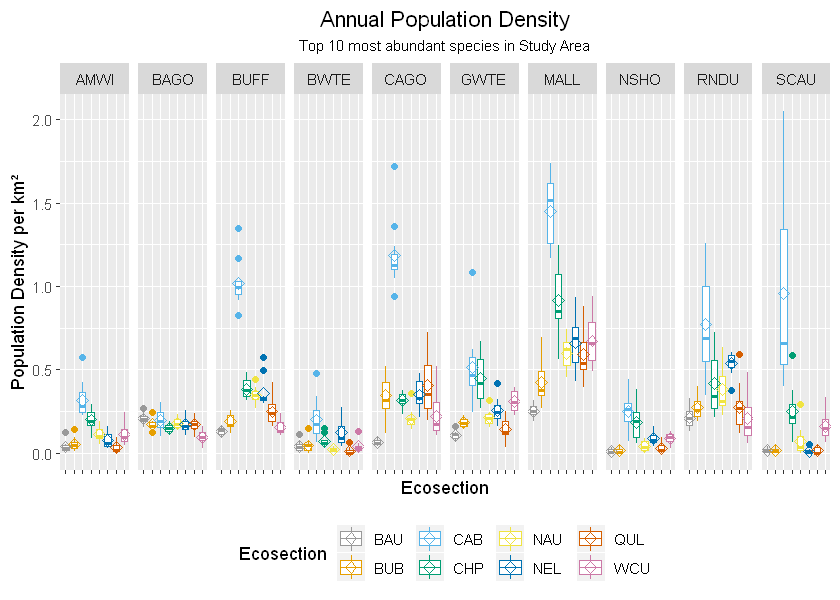

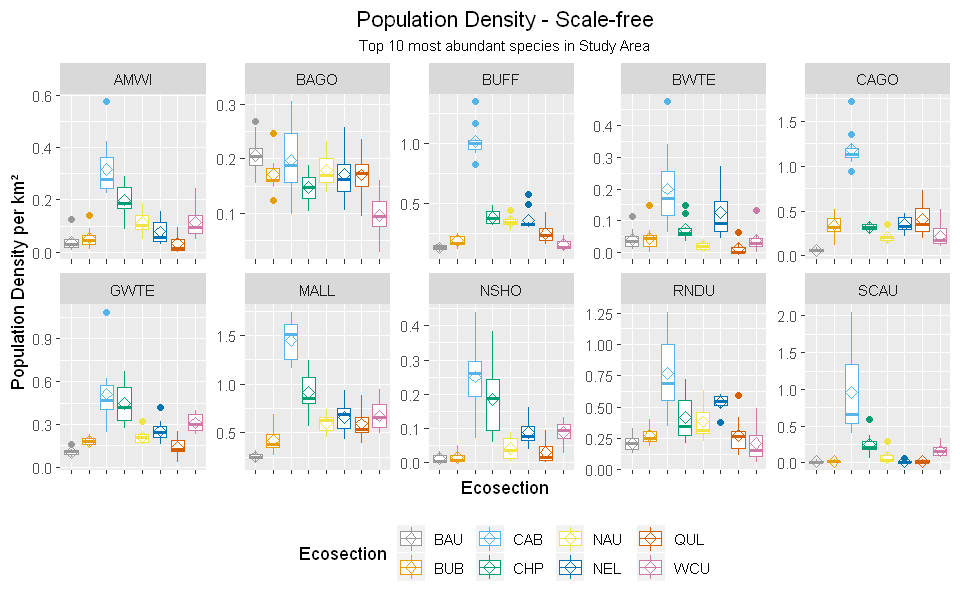

In [56]:
bp <- ggplot(eco_sp_yr, aes(x = eco, y = density, colour = eco)) + geom_boxplot() + 
    colColour + ggtitle(label = "Annual Population Density", subtitle = "Top 10 most abundant species in Study Area") + 
    theme(legend.position = "bottom", legend.direction = "horizontal", legend.box = "vertical", 
        axis.text.x = element_blank(), plot.title = element_text(hjust = 0.5), plot.subtitle = element_text(hjust = 0.5, 
            size = 9)) + ylab("Population Density per km²") + xlab("Ecosection") + 
    stat_summary(fun.y = mean, geom = "point", shape = 5, size = 2)  # Add means

options(repr.plot.width = 7, repr.plot.height = 5)
bp + facet_wrap(. ~ sp_id, ncol = 13)

# # Display with dynamic scale ranges
# options(repr.plot.width = 8, repr.plot.height = 12)
# bp + facet_wrap(. ~ sp_id, ncol = 3, scales = "free") + geom_point(size = 0.4) 

options(repr.plot.width = 8, repr.plot.height = 5) 
bp + facet_wrap(. ~ sp_id, ncol = 5, nrow= 2, scales = "free") + ggtitle("Population Density - Scale-free")

sp_yr <- ggplot(eco_sp_yr, aes(x = year_, y = density, colour = eco, shape = eco)) + 
    geom_point() + geom_smooth(size = 0.5, method = "auto", se = FALSE) + colShape + 
    colColour + ggtitle(label = "Species Population Density", subtitle = "2007 to 2017") + 
    theme(legend.position = "bottom", legend.direction = "horizontal", legend.box = "vertical", 
        plot.title = element_text(hjust = 0.5), plot.subtitle = element_text(hjust = 0.5, 
            size = 9)) + ylab("Population Density per km²") + xlab("Year (2007-2017)")

# Display with dynamic scale ranges
options(repr.plot.width = 8, repr.plot.height = 13)
sp_yr + facet_wrap(. ~ sp_id, ncol = 2, scales = "free") + geom_point(size = 0.4) + 
    scale_x_continuous(breaks = c(2007, 2009, 2011, 2013, 2015, 2017))



## PLACEHOLDER FOR DISCUSSION OF SPECIES-SPECIFIC POPULATION TRENDS

The species demonstrating the greatest variability in abundance include  Lesser Scaup* (LESC), Ring-necked Duck (RNDU), Canada Goose (CAGO), and Mallard (MALL).
The distributions of the ten most common species suggest it is LESC and RNDU species driving the increasing population trends in the Cariboo Basin and the Chilcotin Plateau.  Mallard (MALL), Canada Goose (CAGO), Green-Winged Teal (GWTE), Blue-Winged Teal (BWTE), and Northern Shoveler (NOSH) reflect concordant year to year fluctuations--decreasing from 2007 to 2010, increasing between 2010 and 2015, and decreasing again to 2017. American Wigeon (AMWI) to a lesser degree follows the main trend but appears to be slightly increasing in the Cariboo Basin. Barrow's Goldeneye (BAGO) distributions remain steady throughout their distributions in all ecosections.

<sub>*Note the WBPHS does not distinguish between Lesser and Greater Scaup species and are recorded as generic SCAU however only the former regularly occur in this area.</sub>



In [59]:
# Get a table listing of the top 10 most common species in each ecosection
# sp_id contains species guilds as well as single species
iws_wide <- iws
sp_long <- iws_wide[,1:grep("wodu", colnames(iws_wide))] %>%
    gather(sp_id, pop, amwi:wodu) %>%
    group_by(eco, sp_id)%>%
    summarise(pop=sum(pop))%>%
    group_by(eco)%>%
    mutate(ranks = dense_rank(desc(pop)))%>%
    filter(ranks<=10)%>%
    dplyr::select(-c(pop))%>%
    spread(eco, sp_id) %>%
    group_by(ranks)

print("Top 10 Cumulatively Most Abundant Species within each Ecosection")
# function to convert lowercase to upper
sp_long <- data.frame(lapply(sp_long, function(v) {
  if (is.character(v)) return(toupper(v))
  else return(v)
}))
sp_long

[1] "Top 10 Cumulatively Most Abundant Species within each Ecosection"


ranks,BAU,BUB,CAB,CHP,NAU,NEL,QUL,WCU
<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,MALL,MALL,MALL,MALL,MALL,MALL,MALL,MALL
2,RNDU,CAGO,CAGO,GWTE,RNDU,RNDU,CAGO,GWTE
3,BAGO,RNDU,BUFF,RNDU,BUFF,BUFF,RNDU,CAGO
4,BUFF,BUFF,SCAU,BUFF,GWTE,CAGO,BUFF,RNDU
5,GWTE,GWTE,RNDU,CAGO,CAGO,GWTE,BAGO,SCAU
6,CAGO,BAGO,GWTE,SCAU,BAGO,BAGO,GWTE,BUFF
7,COME,AMWI,GADW,AMWI,AMWI,BWTE,HOME,AMWI
8,HOME,HOME,AMWI,NSHO,HOME,HOME,AMWI,BAGO
9,BWTE,COME,NSHO,BAGO,SCAU,NSHO,NSHO,NSHO


In [ ]:
# Animation of facet_grid scatterplot - too dizzying really.

g <- ggplot(eco_sp_yr, (aes(x = eco ,y = density, size = density, colour=eco))) +
    ggtitle("Population Density in Ecosection by Year") +
      geom_point() + colColour + theme(legend.position="bottom",legend.direction = "horizontal", legend.box="vertical", 
                                  axis.text.x = element_blank(), 
                                    plot.title = element_text(hjust = 0.5),
                                    plot.subtitle = element_text(hjust=0.5, size=17))+ 
       xlab("Ecosection") + ylab("Total Breeding Population Density per ha")


g + facet_wrap(. ~ toupper(sp_id), ncol=3) + transition_time(year_) + labs(subtitle = '{frame_time}')

## Evaluation of Modelling Approaches and Data Inputs

Points of consideration for the modelling framework, data inputs, and their interactions

#### Data Properties
* Accuracy and uncertainty
* Data acquisition and availability
* Logical consistency and timeliness
* Scale, extent and resolution 
* Direct vs Indirect 
* Mechanisitic vs correlated 
* Ecological and physiological

####  Model Properties
* Predictive vs Explanatory (Random Forest vs Regression-based approaches)
* Intepretation - scale of analyses and applications

<img src="./images/modeling_guisan.png" alt="Drawing"/>


## Waterfowl Survey Observation data
##### Weaknesses
* Positional uncertainty of observation data
* Inconsistency of survey methods - technological change
    - GPS point collection & navigation and manual data collection < 2010
    - 2010 >= Mobile GIS navigation, automated point collection and voice recording
* Survey conditions (climate and weather-dependent, pilot experience)
* Relative coverage - 400m wide strip transects spaced 10 miles apart (~2.5% study area)
* Inconsistent survey design of Traditional North American Breeding Waterfowl Habitat and Population Survey (1955-present) - high and low density strata
* Inconsistent observation of habitat variables and no pond counts
* Ecosection boundaries have been updated from v1.0 to 2.1(2006) since first designed

##### Strengths
* Consistent and highly experienced observers 
* Continuous, on-going annual basis since 2006 
* Large database ~ 30,000+ observation records, 27 distinct species
* Large extent ~ 10,000,000+ ha (~40,000+ sq miles); larger than Iceland
<img src="./images/overview_observations.png" alt="Drawing" style="width: 350px;"/>

### Frequency distributions of observation counts

Zero-inflation of observation records at the 400m scale
![image](./images/sp_count_freq_distribution.png)

## Explanatory Predictor Candidates
#### Climate
* Growing Degree Days - Primary Productivity
* Precipitation as Snow - Hydrology is driven by snowpack 
* Spring Temperature - Timing of freshet
* Heat Moisture Index - (MAT+10)/(MAP/1000) 
* Climate Moisture Index - P - PE (Precipitation - Potential Evaporation)

#### Landscape
* Topography - aspect, slope, elevation
* Landcover - readily available interpreted data product (CEC 2010)
* Disturbance - roads atlas, fire database, Mountain Pine Beetle 
* Wetland habitat - lakes, rivers, wetlands
    * smaller wetlands <10 ha ≈ increased productivity
    * data creation driven by forestry industry
    
#### Land management
* Agricultural Land Reserve
* Protected Areas
* Tenure

<sub>See 'data_dictionary.xlsx'</sub>

### Sample of Candidate Predictors

![image](./images/sample_variables.png)

## PLACEHOLDER  PREDICTORS  - DESCRIPTIONS

#### "Ducks like water." - Pimm (1994)

* Small wetlands (<10 ha) are more productive
* Ephemeral wetlands 
* Standing water in agricultural fields
* Hydrology is driven by snowpack  

No direct measurements either by freely, available interpreted remote sensing products nor by survey methodology (as in pond counts captured by the traditional WBPHS)

Static proxy data only:

* Freshwater Atlas - lakes, wetlands, rivers, stream
* CEC 2010 Landcover 



#### Annual Climate Variables
![image](./images/clim_dif_bffp.png)
![image](./images/clim_dif_tave04.png)
![image](./images/clim_dif_tave_wt.png)
![image](./images/clim_dif_pas_wt.png)

## Random Forest - Overview of steps
1. Random forest approach selected for predictive power
2. Tool selection
    * 'cforest' party package - conditional inference trees
    * 'randomForest' - favours continuous variables and variables with many categories
    * 'Forest-based Classification and Regression' ArcGIS Pro v2.2+
3. Variable selection and variable importance - cforest is 'unbiased' to correlated data but is processor-intensive
4. Data processing
5. Model evaluation
     * Model stability
     * Model accuracy
6. Refine Model and repeat #5 Model evaluation

<a href=https://core.ac.uk/download/pdf/12170130.pdf><div style="text-align: right"> <font size = -1>Strobl et al, 2009</font> </div></a>  

![image](./images/random_forest_diagram_complete_vankar_jaganath_cc.png) 
<div style="text-align: right"> <sub> cc Vankar Jaganath <sub> </div>

### Variable Selection 
##### Ecological considerations and issues
* Climate normals vs mean vs timeliness - response lag
* Life history characteristics - Species breeding philopatry
* Density-dependence and interspecific competition
* Wintering conditions

##### Addressing correlation, collinearity and variance inflation
* High degree of correlation in climate and ecological variables 
* Imbalanced classes of predictor variables
* Spatial variability

##### Scale
* Variability of parameter values at different scales 
    - entire study area and ecosection
* Temporal
    * only climate is dynamic (year to year)
    * all other landscape inputs are static except for cutblocks, fire polygons and Mountain Pine Beetle which were not included due to longer-term scale of effect, difficulty in interpretation and prediction
* Environmental variables were generalized to account for landscape effects within 1 km radius 
* Species-level distinctions e.g. extent of home range should determine the radius used to generalize landscape effects
        


## Model Data Preparation - pre-processing
1. Visualization
2. Identify predictors with no variance or zero-variance
3. Detect and address correlation, multicollinearity and VIF
    * Detect linear combosData 
    * transformation if required/recommended 
4. Data split - train, test (*validate can be used for model tuning)
5. Model training and parameter tuning


#### Example collinearity - Climate
* Correlation thresholds:
    * < 0.7 (Green, 1979) 
    * < 0.8 (Menard, 2002)
* Multicollinearity - correlation between 3+ variables even when pair-wise correlation is absent
    * critical threshold 5-10 (Guisan et al, 2017)
    * VIF threshold < 5 


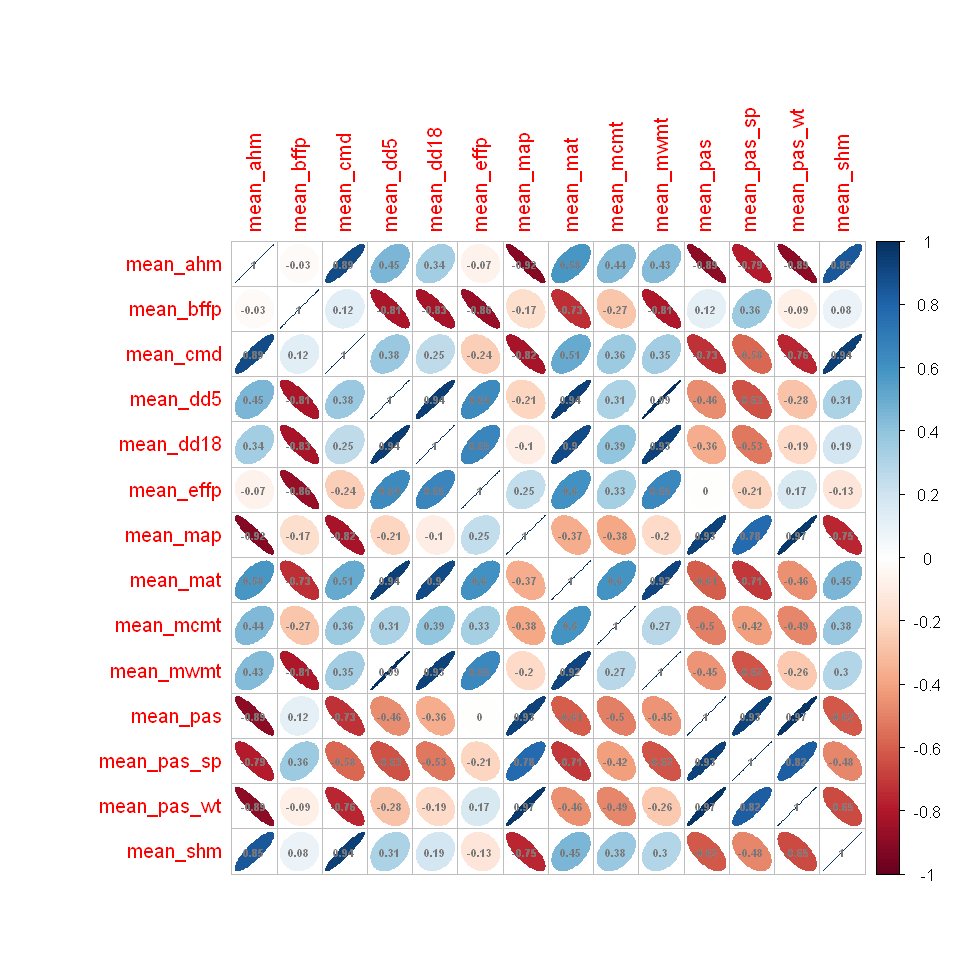

In [56]:
## Address Correlations, Multicollinearity and VIF
library(Hmisc)
library(corrplot)
iws_wide <- iws
# Example climate variable selection
# pairwise correlations with 'rcorr'
clim_var <- iws_wide[,grep("mean_ahm", colnames(iws_wide)):grep("mean_shm", colnames(iws_wide))]
# Set plot size
options(repr.plot.width=8, repr.plot.height=8)
#Check correlations
corr <- rcorr(as.matrix(clim_var))
corrplot(corr$r, method='ellipse', number.cex=60/ncol(df),number.digits=2,addCoef.col="gray47")


Filter candidates identifying key drivers: snowpack, growing degree days (DD5), moisture index

'data.frame':	180950 obs. of  3 variables:
 $ mean_mat    : num  2.04 2.04 2.04 2.04 2.04 ...
 $ mean_mcmt   : num  -9.38 -9.38 -9.38 -9.38 -9.38 ...
 $ norm_tave_wt: num  -7.3 -7.3 -7.3 -7.3 -7.3 -7.3 -7.3 -7.3 -7.3 -7.3 ...
 Named num [1:3] 2.04 14.85 17.63
 - attr(*, "names")= chr [1:3] "mean_mat" "mean_mcmt" "norm_tave_wt"


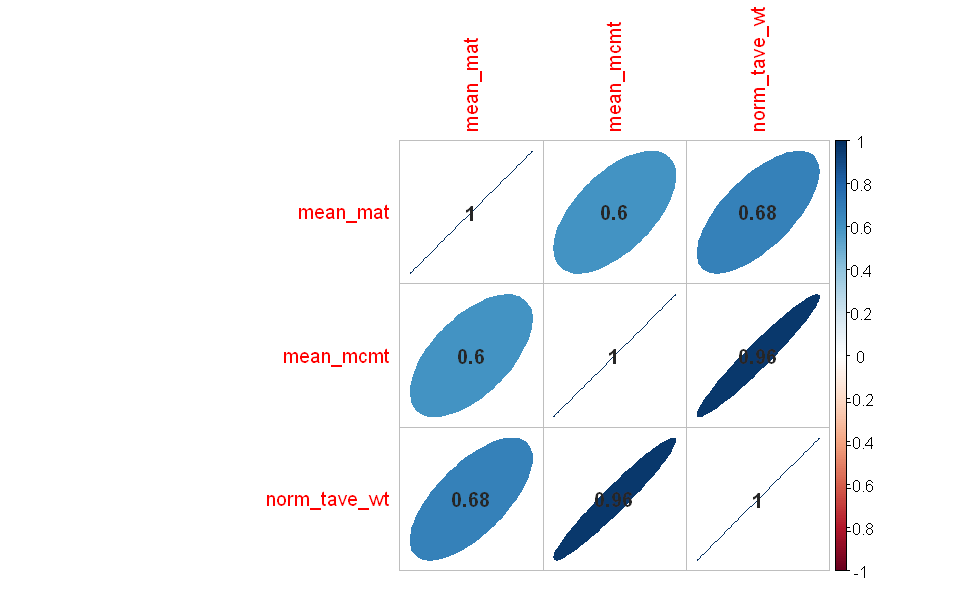

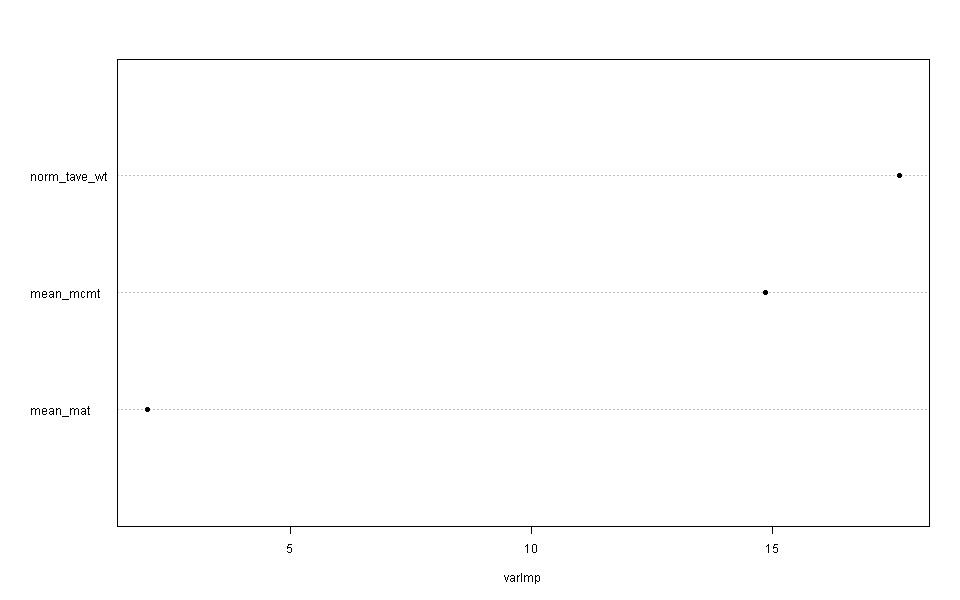

In [57]:
library(dplyr)
# Subset
# grep("mean_shm", colnames(iws_wide))
# grep("mean_pas_wt", colnames(iws_wide))
# grep("mean_dd5", colnames(iws_wide))

clim_var_1 <- iws_wide[,c(76, 77, 67)]

# Set plot size
options(repr.plot.width=8, repr.plot.height=5)

# Check correlations
# Set plot size
corr <- rcorr(as.matrix(clim_var_1))
corrplot(corr$r, method='ellipse', addCoef.col='gray15')
str(clim_var_1)

library(usdm)
# VIF calculation
v <- usdm::vif(clim_var_1)
vm <- v$VIF
names(vm) <- v$Variables
str(vm)
dotchart(vm[order(vm)], cex = 0.6, pch = 19,
         gcolor = "#999999",
         xlab = "varImp")

## DISCUSSION PLACEHOLDER FOR CANDIDATE VARIABLES



 Named num [1:3] 1.94 13.35 15.92
 - attr(*, "names")= chr [1:3] "mean_mat" "mean_mcmt" "norm_tave_wt"


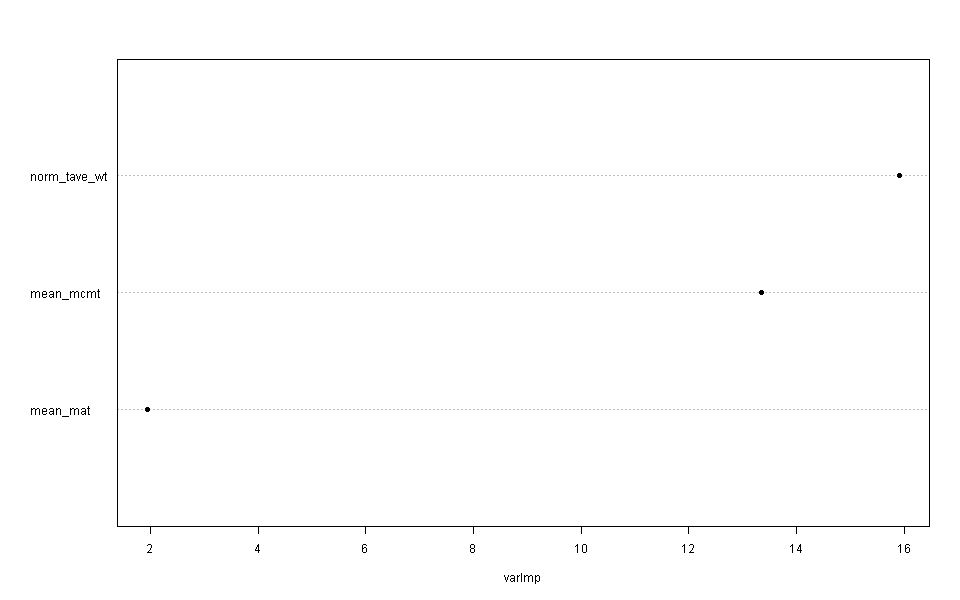

In [58]:
# Assess multicollinearity
library(usdm)
v <- usdm::vif(clim_var_1)
vm <- v$VIF
names(vm) <- v$Variables
str(vm)
dotchart(vm[order(vm)], cex = 0.6, pch = 19,
         gcolor = "#999999",
         xlab = "VIF")

##  PLACEHOLDER cforest model code within Code Snippets section 

Due to spatial distribution of variables and as preliminary models run at the level of the entire study area resulted in significant variable important measures for the ecosection, subsequent analyses were performed on the individual ecosection scale.

Two temporal scales - mean average over study period as well as model runs on annual data

### Random Forest Model Evaluation
cforest_unbiased
    * can handle correlated predictors 
    * computationally intensive 
    * preliminary model runs without filtering correlated variables ~ 240+ hours
    * OOB measure rather than rmse from train, validate, test (70, 15, 15) or 80/20 train/test due to zero-inflation
##### Model Stability - Variable Important Measures (varimp)
* Run models with different seeds to ensure stability of measure
* Compare ranks of varimp ( r package 'SuperRanker') 
* Evaluate top ranking variables as a whole, sp and groups/guilds 

![image](./images/varimp_multi.png)


<sub>Toggle cell below for model evalution code - note raw data not included in notebook<sub>

## Random forest Data model for 'cforest'

An example of the cforest model implementation (note that input data for an interactive example are not included due to file size restrictions but a small subset for illustrative purposes are planned for the future).

cf <- cforest(sp ~ aspect + slope + cec_mixed_forest + cec_broadleaf +cec_needleleaf +
 fwa_1 + fwa_2 + fwa_3 + fwa_4 + fwa_6 + fwa_7 + fwa_8 + str_s + str_m +
 fwa_r + fwa_w +shrcx_10less + shrcx_10plus + dra_u + 
 mean_dd5 + mean_bffp + mean_pas_wt + mean_shm + year_ ,
 data = mydata, controls =  cforest_unbiased(ntree = 5000, mtry = 5)

## Accuracy Assessment

'cforest' - OOB (Out-Of-Bag) error can be determined with the 'caret' package's "cforestStats" function on the data object output by the predictive modeling function for the RMSE, MAE and r-squared values.

OOB <- caret:::cforestStats(cf)

## Model Predictions
### PREDICTIONS: R 'party' package cforest 
#### Example of predicted distribution for Bufflehead and Blue-winged Teal in Cariboo Basin
![image](./images/cab_buff_cforest.png)
![image](./images/cab_bwte_cforest.png)



In [ ]:
## Regression-based  - Overview of steps
1. Generalized Linear Mixed Models approach
    * Allows for variable response distributions - Poisson, Gamma, etc
    * Zero-inflated negative binomial distribution - variance>>mean
             * 16ha spatial and yearly scale ~ 92% records recorded 0
    * Fixed and random effects
    * Flexible, efficient
2. Tool selection
    * R packages: lme4, glmmTMB
3. Variable selection 
    * Identified in Random Forest modeling - but collinearity MUST be addressed
4. Data processing
    * Identify response distribution 
    * Standardization 
5. Model evaluation
     * Model stability
     * Model accuracy
6. Refine Model
    * Assess model performance (see Points to Consider #1 below)
  
#### Resources
https://ms.mcmaster.ca/~bolker/classes/s4c03/notes/GLMM_Bolker_draft5.pdf
https://cran.r-project.org/web/packages/glmmTMB/vignettes/glmmTMB.pdf
https://www.biorxiv.org/content/10.1101/132753v1


## Future Recommendations

#### Data inputs

*  <a href="https://www.esa-landcover-cci.org/?q=node/1">European Space Agency Climate Change Initiative (ESA CCI)</a> project has a number of exciting projects. 
Currently available products include:
<a href = "https://www.esa-landcover-cci.org/?q=node/175">Global Land Cover time series 1992-2015</a> at 300m 

## Tools and technologies
* 'caret' package - Classification And REgressing Training) - streamlines predictive modeling processes
* Jupyter notebook - computational notebook (R markdown) 
* tidyverse - family of R packages sharing a common syntax (dplyr, ggplot2, purr, tidyr, etc) 
* rpy2 - interface to R from within Python - switch between R and Python with R magics 
* R-ArcGIS Bridge - interface ArcGIS and R (with R v 3.2.2+)
* Python Toolbox - single container
* spatial analysis in R 
* Python 'pandas' library for data science
* ArcGIS-API for Python - responsive

# QUESTIONS/POINTS TO CONSIDER
1. Assessing model performance - train, validate, test - can be supplanted with resampling procedures:
    1. assess with resubstitution run model results against the training dataset 
        * goodness of fit, but no assessment of predictive ability against independent data
        * assess normality of residuals
        * assess fit of distributions (e.g. Komogorov-Smirnov)
    2. assess by randomization (permutation)
        * randomize the training data through resampling without substitution of the response or predictor variables
        * fit new model with the randomized dataset and repeat ~1000x then assess the probability the model measures (e.g. response/coefficient or model fit) could occur purely by chance out of all the runs (permutation-based p-values)***THIS IS WHAT THE PERMUTATION IMPORTANCE MEASURE does in cforest's 'varimp' function which assesses the correlation of the model predictions made with the 'train' set and the predictions of the model with one of the variables permuted (randomized)

2. Should I explore objective/automated predictor selection methods?



# CODE SNIPPETS


In [ ]:
# cforest - party package
# https://journal.r-project.org/archive/2009/RJ-2009-013/RJ-2009-013.pdf

#install.packages("parallel") # is base, should not be updated (MacOS / R 3.6.0  / RStudio Version 1.2.1335 )
#install.packages("tools") # is base, should not be updated (MacOS / R 3.6.0  / RStudio Version 1.2.1335 )

library(parallel)
library(lattice)
library(Hmisc)
library(party)
library(tools)
library(icesTAF)

#======================================================
#****************BATCH RUN - PARALLEL
#======================================================

#wd <- "/Users/hashimotoy/Desktop/rf_20190615/eco_BAU"
wd <- "/Users/hashimotoy/Desktop/rf_20190615/eco_CAB"

useMaxCoreCount <- 12
ntreeCount <- 5000
tries = 4

outwd <- paste(wd,"results", sep = '/')
mkdir(outwd)
setwd(wd)
getwd()

files <- list.files(pattern = ".csv$")
mclapply(files, function(x){
  setwd(wd)
  fn <- file_path_sans_ext(x)
  print(paste("START Processing cforest for:", fn))
  mydata <- read.csv(x)
  set.seed(47)

  # for CAB - fwa_r does not have enough variabiity 
  cf <- cforest(i ~ aspect + slope + alr + pa + cec_urban + cec_mixed_forest + cec_broadleaf + cec_needleleaf +
                  fwa_1 + fwa_2 + fwa_3 + fwa_4 + fwa_5 + fwa_6 + fwa_7 + fwa_8 + str_s + str_m +
                  fwa_r + fwa_w  + dra_u + 
                  norm_dd5 + norm_ahm + pas_wt + tave04 + bffp,
                data = mydata,
                controls =  cforest_unbiased(ntree = ntreeCount, mtry = tries)
  )
  
  print(paste("cforest done:", x))
  saveRDS(cf, paste(outwd, paste("cf_", fn, ".rds", sep = ""), sep="/"))
  vi <- varimp(cf, conditional = TRUE)
  
  setwd(outwd) # DOING OUTPUT NOW
  # write.csv(vi, paste(fn, ".csv", sep = ""), row.names = FALSE)
  df_vi <- as.data.frame(vi);
  write.csv(df_vi,paste("DF-",fn,".csv", sep=""))
  print(paste("COMPLETED cforest of:", fn))
}, mc.preschedule = TRUE , mc.cores = min(useMaxCoreCount,detectCores()))


setwd(outwd)
#f <- files[1]  # Uncomment to troubleshoot single file
varimpFiles <- list.files(outwd, pattern = ".csv$")
lapply(varimpFiles, function(f) {
  print(paste("Starting plot", f))
  fn <- file_path_sans_ext(f)
  df_vi <- read.csv(f)
  v <- as.vector(df_vi$vi)
  names(v) <- df_vi$X
  dotchart(v[order(v)], cex = 0.9, pch = 19,
           gcolor = "#999999",
           xlab = "varImp", main = fn)
  dev.copy(png, paste(outwd, paste("varimp_", fn, ".png", sep = ""), sep = "/"))
  dev.off()
  print(paste("plot done:", fn))
})

# Not incorporated in batch: deriving OOB, Response, Probability
cf_response <- predict(cf,newdata = fishnet, OOB = TRUE, type = 'response')
cf_prob <- predict(cf,newdata = fishnet,OOB = TRUE, type = "prob" )


print("ALL DONE")

#================================================

In [ ]:
## 'SuperRanker' to assess stability of the ranking order of varimp from cforest

# Sequential rank agreement methods for comparison of ranked lists
# https://github.com/tagteam/SuperRanker

fgcRequire <- function(pkg) {
  if(pkg %in% rownames(installed.packages()) == FALSE) {
    install.packages(pkg)
  }
}

fgcRequire("devtools")
library(devtools)

install_github('TagTeam/SuperRanker')
library(SuperRanker)  # For the SuperRanker package
wd <- "../eco_CAB/"
wdA <- paste0(wd,"results-seed-47")
wdB <- paste0(wd,"results-seed-742938")
wdC <- paste0(wd,"results-seed-42")
              
af <- list.files(wdA, "*.csv$")
bf <- list.files(wdB, "*.csv$")
cf <- list.files(wdB, "*.csv$")

if (length(intersect(af,bf)) != length(bf)) { 
  print("unpaired input sets")
  return()
}

f <-  af[1] # DEBUG

err <- as.data.frame(sapply(af, 
#tErr <- sapply(af, 
function(f) {
  setwd(wdA)
  a <- read.csv(f)
  sa <- order(a$vi, decreasing = TRUE)
  
  setwd(wdB)
  b <- read.csv(f)
  sb <- order(b$vi, decreasing = TRUE)
  
  setwd(wdC)
  c <- read.csv(f)
  sc <- order(b$vi, decreasing = TRUE)
  

  i <- cbind(sa,sb,sc)
  mlist <- matrix(i,ncol=3)
  #rank <- overlap(mlist)​# Sequential rank agreement methods for comparison of ranked lists
# https://github.com/tagteam/SuperRanker

fgcRequire <- function(pkg) {
  if(pkg %in% rownames(installed.packages()) == FALSE) {
    install.packages(pkg)
  }
}

fgcRequire("devtools")
library(devtools)

install_github('TagTeam/SuperRanker')
library(SuperRanker)  # For the SuperRanker package
wd <- "../eco_CAB/"
wdA <- paste0(wd,"results-seed-47")
wdB <- paste0(wd,"results-seed-742938")
wdC <- paste0(wd,"results-seed-42")
              
af <- list.files(wdA, "*.csv$")
bf <- list.files(wdB, "*.csv$")
cf <- list.files(wdB, "*.csv$")

if (length(intersect(af,bf)) != length(bf)) { 
  print("unpaired input sets")
  return()
}

f <-  af[1] # DEBUG

err <- as.data.frame(sapply(af, 
#tErr <- sapply(af, 
function(f) {
  setwd(wdA)
  a <- read.csv(f)
  sa <- order(a$vi, decreasing = TRUE)
  
  setwd(wdB)
  b <- read.csv(f)
  sb <- order(b$vi, decreasing = TRUE)
  
  setwd(wdC)
  c <- read.csv(f)
  sc <- order(b$vi, decreasing = TRUE)
  

  i <- cbind(sa,sb,sc)
  mlist <- matrix(i,ncol=3)
  #rank <- overlap(mlist)
  rank <- smooth_sra(mlist)
  
  print(paste("Result:", f))
  #print(rank)
  #print(rank)
  ul <- cbind(rank$lower,rank$upper)
  
  #r <- ul[1,] # DEBUG
  e <- apply(ul, 1, function(r) {
    return(abs(r[1] - r[2]))
  })
  
  print(paste("Error:"))
  print(e)
  
  m <- mean(e)
  return(c(m,e))
})
)

  rank <- smooth_sra(mlist)
  
  print(paste("Result:", f))
  #print(rank)
  #print(rank)
  ul <- cbind(rank$lower,rank$upper)
  
  #r <- ul[1,] # DEBUG
  e <- apply(ul, 1, function(r) {
    return(abs(r[1] - r[2]))
  })
  
  print(paste("Error:"))
  print(e)
  
  m <- mean(e)
  return(c(m,e))
})
)


In [ ]:
# 'gganimate' Line chart with dots using 'transition_reveal'
library(gganimate)
g <- ggplot(eco_yr, aes(year_, density, group = eco, shape = eco, colour = eco)) + labs(title = "Population Density in Ecosection by Year") + 
    geom_point(size = 4) + geom_line(size = 0.5) + colShape + colColour + theme(legend.position = "bottom", 
    axis.text.x = element_text(angle = 45, vjust = 0.5), plot.title = element_text(hjust = 0.5), 
    plot.subtitle = element_text(hjust = 0.5, size = 17)) + scale_size(guide = FALSE) + 
    xlab("Ecosection") + ylab("Total Breeding Population Density per km²")
g + geom_point((aes(group = seq_along(year_), size = 2))) + transition_reveal(year_) + 
    labs(subtitle = "{frame_along}")

## Dot plot with 'shadow_wake' and 'transition_time'
g <- ggplot(eco_yr, aes(eco, density, size = density, colour = eco)) + geom_point(size = 9) + 
    colColour + ggtitle(label = "Population Density in Ecosection by Year") + theme(legend.position = "bottom", 
    axis.text.x = element_text(angle = 45, vjust = 0.5, size = 9), plot.title = element_text(hjust = 0.5), 
    plot.subtitle = element_text(hjust = 0.5, size = 17)) + xlab("Ecosection") + 
    ylab("Total Breeding Population Density per km²")
g + transition_time(year_) + labs(subtitle = "{frame_time}") + shadow_wake(wake_length = 0.2, 
    alpha = FALSE)

## Bar chart with 'transition_time'
g <- ggplot(eco_yr, aes(eco, density, fill = eco)) + geom_bar(stat = "identity") + 
    colFill + theme(legend.position = "bottom", legend.direction = "horizontal", 
    legend.box = "vertical", axis.text.x = element_text(angle = 45, vjust = 0.5, 
        size = 9), plot.title = element_text(hjust = 0.5), plot.subtitle = element_text(hjust = 0.5, 
        size = 17)) + xlab("Ecosection") + ylab("Total Breeding Population Density per km²")
g + transition_time(year_) + labs(title = "Population Density in Ecosection by Year", 
    subtitle = "{frame_time}")

In [ ]:
# Use package 'caret' - designed for prediction modeling (wish I found this at the start!)
https://cran.r-project.org/web/packages/caret/vignettes/caret.html




# Subsetting data into training, validation and test
# 70/30 - 70 model building, 15 validation, 15 test

require(caTools)
set.seed(101) 
sample = sample.split(data$anycolumn, SplitRatio = .70)
train = subset(data, sample == TRUE) # 70%
non_train  = subset(data, sample == FALSE) #30%

## Split non_training dataset into validate and test

set.seed(123)   #  set seed to ensure you always have same random numbers generated
sample = sample.split(non_train,SplitRatio = 0.5) # splits the data in the ratio 
validate =subset(non_train,sample ==TRUE) # 15%
test=subset(non_train, sample==FALSE) # 15%

#=================================
# split using tidyverse
#=================================
library(tidyverse)

# Create more data to better demonstrate grouping effect
my_dat <-
  data.frame(ID = as.factor(rep(1:3, each = 9)), Var = sample(1:100, 27))

# Randomly assign train/test groups to all values of ID
groups <-
  my_dat %>%
  select(ID) %>%
  distinct(ID) %>%
  rowwise() %>%
  mutate(group = sample(
    c("train", "validate", "test"),
    1,
    replace = TRUE,
    prob = c(0.7, .15, .15) # Set weights for each group here
  ))

groups

In [ ]:
# Housekeeping - manage packages 
version
Packages <- c("tidyverse", "gganimate", "RColorBrewer", "gridExtra", 
             "repr", "knitr", "Hmisc", "corrplot", "usdm", "formattable")
# # Install packages if not installed 
# if (!require("pacman")) install.packages("pacman")
#     pacman::p_load(Packages)

lapply(Packages, require, character.only=TRUE)
# (.packages)() # List loaded packages
   

[1] "C:/Users/hashimotoy/Desktop/ws_prep/rf_400/_inputs"

[1] "joinid"           "year_txt"         "year_"           
  [4] "x_alb"            "y_alb"            "POINT_X"         
  [7] "POINT_Y"          "eco"              "aspect"          
 [10] "slope"            "dem"              "cec_barren"      
 [13] "cec_broadleaf"    "cec_cropland"     "cec_grassland"   
 [16] "cec_mixed_forest" "cec_needleleaf"   "cec_shrubland"   
 [19] "cec_urban"        "fwa_1"            "fwa_2"           
 [22] "fwa_3"            "fwa_4"            "fwa_5"           
 [25] "fwa_6"            "fwa_7"            "fwa_8"           
 [28] "fwa_10ha_less"    "fwa_10ha_more"    "fwa_r"           
 [31] "fwa_w"            "shrcx_10less"     "shrcx_10plus"    
 [34] "str_1"            "str_2"            "str_3"           
 [37] "str_4"            "str_5"            "str_6"           
 [40] "str_7"            "str_8"            "str_9"           
 [43] "str_all_1000"     "str_m"            "str_s"           
 [46] "pa"               "alr"              "dra_p"           
 [49] "dra_u"            "bec_sz_txt"       "bec_zn"          
 [52] "norm_ahm"         "norm_bffp"        "norm_cmd"        
 [55] "norm_dd5"         "norm_dd18"        "norm_effp"       
 [58] "norm_map"         "norm_mat"         "norm_mcmt"       
 [61] "norm_mwmt"        "norm_pas"         "norm_shm"        
 [64] "norm_pas_sp"      "norm_pas_wt"      "norm_tave_sp"    
 [67] "norm_tave_wt"     "norm_tave04"      "mean_ahm"        
 [70] "mean_bffp"        "mean_cmd"         "mean_dd5"        
 [73] "mean_dd18"        "mean_effp"        "mean_map"        
 [76] "mean_mat"         "mean_mcmt"        "mean_mwmt"       
 [79] "mean_pas"         "mean_pas_sp"      "mean_pas_wt"     
 [82] "mean_shm"         "ahm"              "bffp"            
 [85] "cmd"              "dd5"              "effp"            
 [88] "mat"              "map"              "pas_wt"          
 [91] "shm"              "tave_sp"          "tave_wt"         
 [94] "tave04"           "amwi"             "bago"            
 [97] "buff"             "bwte"             "cago"            
[100] "canv"             "cite"             "cogo"            
[103] "come"             "gadw"             "gwte"            
[106] "hadu"             "home"             "ltdu"            
[109] "mall"             "nopi"             "nsho"            
[112] "rbme"             "redh"             "rndu"            
[115] "rudu"             "scau"             "sngo"            
[118] "swan"             "trus"             "wfgo"            
[121] "wodu"             "sp_div"           "sp_tot"          
[124] "mergansers"       "dabblers"         "divers"          
[127] "dabbler_plants"   "dabbler_seeds"    "dive_fish"       
[130] "dive_insects"     "dive_plants"      "ground_plants"   
[133] "ground_seeds"     "cavity"           "floating"        
[136] "ground"

ERROR while rich displaying an object: Error in .escape_vec(vec, "html"): expected `vec` to be a vector or factor but it is a NULL

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](ob


A formattable: 88 × 14

|  &lt;fct&gt; |  &lt;int&gt; |  &lt;dbl&gt; |  &lt;dbl&gt; |  &lt;dbl&gt; |  &lt;dbl&gt; |  &lt;dbl&gt; |  &lt;dbl&gt; |  &lt;dbl&gt; |  &lt;dbl&gt; |  &lt;dbl&gt; |  &lt;dbl&gt; |  &lt;dbl&gt; |  &lt;dbl&gt; |
|---|---|---|---|---|---|---|---|---|---|---|---|---|---|
| BAU | 2007 | 2.148278 | 1.31889282 | -8.327486 |  -6.744480 | 167.19376 | 176.08400 | 251.4126 | 248.3991 |  0.82938526 |  -8.8902478 | -1.5830061 |   3.0135179 |
| BAU | 2008 | 2.148278 | 0.03360154 | -8.327486 |  -9.778951 | 167.19376 | 162.05085 | 251.4126 | 249.1336 |  2.11467654 |   5.1429031 |  1.4514644 |   2.2790473 |
| BAU | 2009 | 2.148278 | 1.35300933 | -8.327486 | -10.951078 | 167.19376 | 195.03219 | 251.4126 | 265.3145 |  0.79526875 | -27.8384294 |  2.6235919 | -13.9018346 |
| BAU | 2010 | 2.148278 | 2.58622465 | -8.327486 |  -8.221757 | 167.19376 |  85.52044 | 251.4126 | 246.2517 | -0.43794657 |  81.6733183 | -0.1057290 |   5.1609269 |
| BAU | 2011 | 2.148278 | 0.75413582 | -8.327486 |  -9.727808 | 167.19376 | 163.90023 | 251.4126 | 256.0679 |  1.39414226 |   3.2935307 |  1.4003219 |  -4.6552945 |
| BAU | 2012 | 2.148278 | 2.48368201 | -8.327486 |  -7.350048 | 167.19376 | 155.08722 | 251.4126 | 247.7383 | -0.33540393 |  12.1065336 | -0.9774380 |   3.6742839 |
| BAU | 2013 | 2.148278 | 0.93707757 | -8.327486 |  -7.732346 | 167.19376 | 177.06051 | 251.4126 | 251.9434 |  1.21120051 |  -9.8667525 | -0.5951400 |  -0.5307370 |
| BAU | 2014 | 2.148278 | 2.03978114 | -8.327486 |  -9.426231 | 167.19376 | 169.75089 | 251.4126 | 250.5607 |  0.10849694 |  -2.5571291 |  1.0987448 |   0.8519472 |
| BAU | 2015 | 2.148278 | 2.81644673 | -8.327486 |  -6.042259 | 167.19376 | 183.66720 | 251.4126 | 245.3882 | -0.66816865 | -16.4734471 | -2.2852269 |   6.0244609 |
| BAU | 2016 | 2.148278 | 4.42124236 | -8.327486 |  -6.337464 | 167.19376 | 170.63276 | 251.4126 | 248.0496 | -2.27296427 |  -3.4390087 | -1.9900225 |   3.3630512 |
| BAU | 2017 | 2.148278 | 2.89697457 | -8.327486 |  -9.488317 | 167.19376 | 119.36563 | 251.4126 | 259.6508 | -0.74869649 |  47.8281300 |  1.1608304 |  -8.2381719 |
| BUB | 2007 | 2.634199 | 1.87079381 | -7.359361 |  -5.927359 | 120.27309 | 129.03645 | 252.9331 | 250.9131 |  0.76340489 |  -8.7633550 | -1.4320020 |   2.0199700 |
| BUB | 2008 | 2.634199 | 0.49595607 | -7.359361 |  -8.744433 | 120.27309 | 116.84873 | 252.9331 | 250.5901 |  2.13824264 |   3.4243635 |  1.3850724 |   2.3429855 |
| BUB | 2009 | 2.634199 | 1.86480280 | -7.359361 |  -9.802546 | 120.27309 | 137.89416 | 252.9331 | 265.3280 |  0.76939591 | -17.6210684 |  2.4431852 | -12.3949076 |
| BUB | 2010 | 2.634199 | 2.87149276 | -7.359361 |  -7.245382 | 120.27309 |  62.10085 | 252.9331 | 250.4353 | -0.23729406 |  58.1722416 | -0.1139790 |   2.4977534 |
| BUB | 2011 | 2.634199 | 1.10034948 | -7.359361 |  -8.759411 | 120.27309 | 113.43335 | 252.9331 | 256.3585 |  1.53384923 |   6.8397404 |  1.4000499 |  -3.4253620 |
| BUB | 2012 | 2.634199 | 2.90189715 | -7.359361 |  -6.843784 | 120.27309 | 121.71792 | 252.9331 | 246.9436 | -0.26769845 |  -1.4448328 | -0.5155766 |   5.9895157 |
| BUB | 2013 | 2.634199 | 2.10374438 | -7.359361 |  -6.881428 | 120.27309 | 105.20919 | 252.9331 | 255.0734 |  0.53045432 |  15.0639041 | -0.4779331 |  -2.1402896 |
| BUB | 2014 | 2.634199 | 2.70364453 | -7.359361 |  -8.524164 | 120.27309 | 120.44433 | 252.9331 | 253.7049 | -0.06944583 |  -0.1712431 |  1.1648028 |  -0.7718422 |
| BUB | 2015 | 2.634199 | 3.05941088 | -7.359361 |  -5.061857 | 120.27309 | 115.53470 | 252.9331 | 248.2471 | -0.42521218 |   4.7383924 | -2.2975037 |   4.6859710 |
| BUB | 2016 | 2.634199 | 5.05821268 | -7.359361 |  -5.533749 | 120.27309 | 117.56016 | 252.9331 | 249.4763 | -2.42401398 |   2.7129306 | -1.8256116 |   3.4568148 |
| BUB | 2017 | 2.634199 | 3.24638043 | -7.359361 |  -9.010334 | 120.27309 |  91.60409 | 252.9331 | 266.1812 | -0.61218173 |  28.6689965 |  1.6509735 | -13.2481278 |
| CAB | 2007 | 4.060898 | 3.36625634 | -6.293121 |  -5.095655 |  89.25416 |  90.72484 | 250.5909 | 245.0543 |  0.69464156 |  -1.4706734 | -1.1974656 |   5.5365677 |
| CAB | 2008 | 4.060898 | 1.51788559 | -6.293121 |  -7.412527 |  89.25416 |  97.65605 | 250.5909 | 243.7473 |  2.54301231 |  -8.4018827 |  1.1194062 |   6.8435916 |
| CAB | 2009 | 4.060898 | 3.31136857 | -6.293121 |  -8.810427 |  89.25416 | 108.40116 | 250.5909 | 261.2867 |  0.74952933 | -19.1469949 |  2.5173063 | -10.6958726 |
| CAB | 2010 | 4.060898 | 4.21238233 | -6.293121 |  -6.036278 |  89.25416 |  54.50688 | 250.5909 | 260.9848 | -0.15148443 |  34.7472846 | -0.2568429 | -10.3939175 |
| CAB | 2011 | 4.060898 | 1.98160753 | -6.293121 |  -7.476973 |  89.25416 |  98.09413 | 250.5909 | 251.5373 |  2.07929037 |  -8.8399710 |  1.1838523 |  -0.9464156 |
| CAB | 2012 | 4.060898 | 4.04446054 | -6.293121 |  -5.974366 |  89.25416 |  67.56626 | 250.5909 | 240.9877 |  0.01643736 |  21.6879073 | -0.3187545 |   9.6031861 |
| CAB | 2013 | 4.060898 | 3.74170891 | -6.293121 |  -6.019406 |  89.25416 |  72.26575 | 250.5909 | 263.5329 |  0.31918899 |  16.9884142 | -0.2737147 | -12.9420710 |
| CAB | 2014 | 4.060898 | 4.10419986 | -6.293121 |  -7.686387 |  89.25416 |  68.12310 | 250.5909 | 255.1687 | -0.04330196 |  21.1310644 |  1.3932657 |  -4.5778421 |
| ... | ... | ... | ... | ... | ... | ... | ... | ... | ... | ... | ... | ... | ... |
| NEL | 2010 | 3.3469388 |  3.7639717 | -8.246978 |  -8.240110 | 166.1142 |  77.86931 | 253.6821 | 250.0565 | -0.41703297 |  88.2448980 | -0.0068681319 |   3.625589 |
| NEL | 2011 | 3.3469388 |  1.7585557 | -8.246978 |  -9.749961 | 166.1142 | 178.24843 | 253.6821 | 255.9717 |  1.58838305 | -12.1342229 |  1.5029827316 |  -2.289639 |
| NEL | 2012 | 3.3469388 |  3.4754317 | -8.246978 |  -7.143132 | 166.1142 | 154.56672 | 253.6821 | 248.5330 | -0.12849294 |  11.5474882 | -1.1038461538 |   5.149137 |
| NEL | 2013 | 3.3469388 |  2.2400706 | -8.246978 |  -7.937873 | 166.1142 | 171.67151 | 253.6821 | 256.5294 |  1.10686813 |  -5.5572998 | -0.3091051805 |  -2.847331 |
| NEL | 2014 | 3.3469388 |  3.1515699 | -8.246978 |  -9.636107 | 166.1142 | 173.57300 | 253.6821 | 252.5110 |  0.19536892 |  -7.4587912 |  1.3891287284 |   1.171115 |
| NEL | 2015 | 3.3469388 |  3.9432889 | -8.246978 |  -6.012794 | 166.1142 | 164.55495 | 253.6821 | 245.8634 | -0.59635008 |   1.5592622 | -2.2341836735 |   7.818681 |
| NEL | 2016 | 3.3469388 |  5.7340659 | -8.246978 |  -6.128611 | 166.1142 | 164.69231 | 253.6821 | 249.1162 | -2.38712716 |   1.4218995 | -2.1183673469 |   4.565934 |
| NEL | 2017 | 3.3469388 |  4.1666797 | -8.246978 |  -9.408634 | 166.1142 | 147.58752 | 253.6821 | 260.1554 | -0.81974097 |  18.5266876 |  1.1616562009 |  -6.473312 |
| QUL | 2007 | 4.4129074 |  3.5814863 | -6.427901 |  -4.855671 | 122.4746 | 123.01956 | 256.3924 | 252.2125 |  0.83142112 |  -0.5449804 | -1.5722294654 |   4.179922 |
| QUL | 2008 | 4.4129074 |  1.7707953 | -6.427901 |  -7.821773 | 122.4746 | 132.26597 | 256.3924 | 253.2947 |  2.64211213 |  -9.7913950 |  1.3938722295 |   3.097784 |
| QUL | 2009 | 4.4129074 |  3.4524120 | -6.427901 |  -9.100130 | 122.4746 | 176.87744 | 256.3924 | 268.2412 |  0.96049544 | -54.4028683 |  2.6722294654 | -11.848761 |
| QUL | 2010 | 4.4129074 |  4.6054759 | -6.427901 |  -6.427249 | 122.4746 |  64.66623 | 256.3924 | 260.2112 | -0.19256845 |  57.8083442 | -0.0006518905 |  -3.818774 |
| QUL | 2011 | 4.4129074 |  2.4391134 | -6.427901 |  -7.945241 | 122.4746 | 128.04954 | 256.3924 | 257.8253 |  1.97379400 |  -5.5749674 |  1.5173402868 |  -1.432855 |
| QUL | 2012 | 4.4129074 |  4.3921773 | -6.427901 |  -5.716949 | 122.4746 |  91.32855 | 256.3924 | 249.0196 |  0.02073012 |  31.1460235 | -0.7109517601 |   7.372881 |
| QUL | 2013 | 4.4129074 |  3.8146023 | -6.427901 |  -6.201695 | 122.4746 |  98.17210 | 256.3924 | 264.6767 |  0.59830508 |  24.3024772 | -0.2262059974 |  -8.284224 |
| QUL | 2014 | 4.4129074 |  4.2928292 | -6.427901 |  -7.968057 | 122.4746 | 121.99087 | 256.3924 | 257.8227 |  0.12007823 |   0.4837027 |  1.5401564537 |  -1.430248 |
| QUL | 2015 | 4.4129074 |  4.7438070 | -6.427901 |  -4.123207 | 122.4746 | 103.96349 | 256.3924 | 251.3651 | -0.33089961 |  18.5110821 | -2.3046936115 |   5.027379 |
| QUL | 2016 | 4.4129074 |  7.2202086 | -6.427901 |  -4.252934 | 122.4746 | 112.20339 | 256.3924 | 251.2999 | -2.80730117 |  10.2711864 | -2.1749674055 |   5.092568 |
| QUL | 2017 | 4.4129074 |  4.2997392 | -6.427901 |  -8.499478 | 122.4746 | 122.72881 | 256.3924 | 264.7601 |  0.11316819 |  -0.2542373 |  2.0715775750 |  -8.367666 |
| WCU | 2007 | 0.9889915 |  0.2374134 | -7.931255 |  -6.517475 | 135.2579 | 157.22402 | 232.3233 | 226.9638 |  0.75157814 | -21.9661278 | -1.4137798306 |   5.359507 |
| WCU | 2008 | 0.9889915 | -1.4033102 | -7.931255 |  -9.210470 | 135.2579 | 137.91840 | 232.3233 | 226.9554 |  2.39230177 |  -2.6605081 |  1.2792147806 |   5.367975 |
| WCU | 2009 | 0.9889915 |  0.1617398 | -7.931255 | -10.371824 | 135.2579 | 150.42571 | 232.3233 | 245.3303 |  0.82725173 | -15.1678214 |  2.4405696690 | -13.006928 |
| WCU | 2010 | 0.9889915 |  1.1454965 | -7.931255 |  -7.851655 | 135.2579 |  78.47729 | 232.3233 | 236.4349 | -0.15650500 |  56.7806005 | -0.0795996921 |  -4.111624 |
| WCU | 2011 | 0.9889915 | -0.7879908 | -7.931255 |  -9.174365 | 135.2579 | 149.11624 | 232.3233 | 235.0477 |  1.77698229 | -13.8583526 |  1.2431100847 |  -2.724403 |
| WCU | 2012 | 0.9889915 |  1.0690531 | -7.931255 |  -7.635797 | 135.2579 | 143.05620 | 232.3233 | 223.6405 | -0.08006159 |  -7.7983064 | -0.2954580446 |   8.682833 |
| WCU | 2013 | 0.9889915 |  0.7726713 | -7.931255 |  -7.674134 | 135.2579 | 120.24172 | 232.3233 | 240.6721 |  0.21632025 |  15.0161663 | -0.2571208622 |  -8.348730 |
| WCU | 2014 | 0.9889915 |  1.0911470 | -7.931255 |  -9.330947 | 135.2579 | 121.47729 | 232.3233 | 230.3249 | -0.10215550 |  13.7806005 |  1.3996920708 |   1.998460 |
| WCU | 2015 | 0.9889915 |  1.3341801 | -7.931255 |  -5.640339 | 135.2579 | 119.30177 | 232.3233 | 226.3387 | -0.34518861 |  15.9561201 | -2.2909160893 |   5.984604 |
| WCU | 2016 | 0.9889915 |  3.4620477 | -7.931255 |  -6.133102 | 135.2579 | 119.48499 | 232.3233 | 227.4219 | -2.47305620 |  15.7729022 | -1.7981524249 |   4.901463 |
| WCU | 2017 | 0.9889915 |  1.3334103 | -7.931255 |  -9.527021 | 135.2579 | 113.30254 | 232.3233 | 247.8630 | -0.34441878 |  21.9553503 |  1.5957659738 | -15.539646 |



ERROR while rich displaying an object: Error in FUN(X[[i]], ...): object 'year_txt' not found

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_text.default(obj)
9. paste

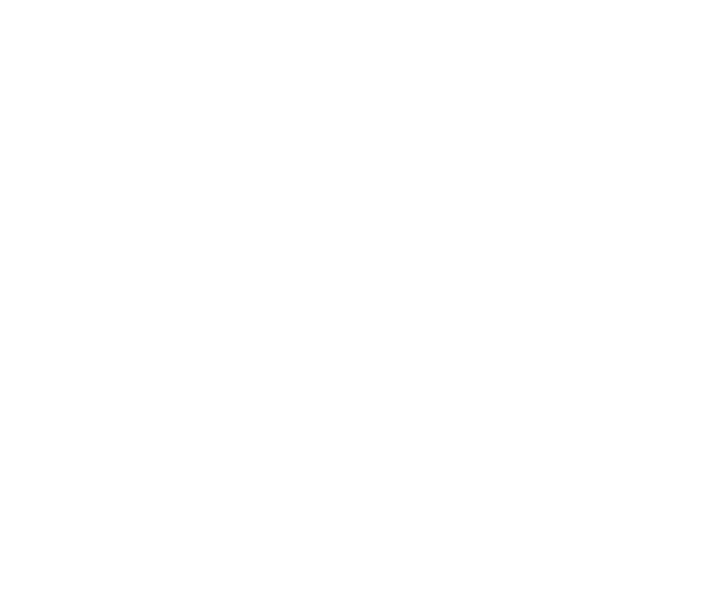

In [24]:
summary <- df %>%
    group_by(eco, year_txt)%>%   
    summarise_at(c("norm_tave04","tave04", "norm_tave_wt", "tave_wt",
                           "norm_pas_wt", "pas_wt", "norm_effp", "effp"), mean) 
summary$d_tave04 <- summary$norm_tave04 - summary$tave04
summary$d_pas_wt <- summary$norm_pas_wt - summary$pas_wt
summary$d_tave_wt <- summary$norm_tave_wt - summary$tave_wt
summary$d_effp <- summary$norm_effp - summary$effp
wd <- "C:/Users/hashimotoy/Desktop/ws_prep/rf_400/_inputs"
setwd(wd)
getwd()
df <- read.csv("id1_400_years.csv")
colnames(df)

summary <- df %>%
  group_by(eco, year_)%>%   
  summarise_at(c("norm_tave04","tave04", "norm_tave_wt", "tave_wt",
                 "norm_pas_wt", "pas_wt", "norm_effp", "effp"), mean)
summary$d_tave04 <- summary$norm_tave04 - summary$tave04
summary$d_pas_wt <- summary$norm_pas_wt - summary$pas_wt
summary$d_tave_wt <- summary$norm_tave_wt - summary$tave_wt
summary$d_effp <- summary$norm_effp - summary$effp

formattable(summary) 

#ggplot
library(ggplot2)
library(RColorBrewer)
cbp1 <- c("#999999", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", 
          "#CC79A7")
names(cbp1) <- levels(df$eco)
colFill <- scale_fill_manual(names(cbp1), values = cbp1)
colColour <- scale_colour_manual(name = "ECO", names(cbp1), values = cbp1)
shp1 <- c(5, 6, 8, 15:19)
colShape <- scale_shape_manual(name = "ECO", names(cbp1), values = shp1)


# #Plot the outcome
g <- ggplot(summary, aes(year_txt, d_tave_wt, colour = eco, shape = eco)) + ggtitle("Climate Difference from 30yr Normal (1981-2010)", 
                                                                              subtitle = "Average Winter Temperature") + geom_point() + colShape + 
  colColour + geom_line() + theme(legend.position = "bottom", legend.direction = "horizontal", 
                    legend.box = "vertical", axis.text.x = element_text(hjust = 0.5), plot.title = element_text(hjust = 0.5), 
                    plot.subtitle = element_text(hjust = 0.5)) + xlab("Ecosection") + ylab("Degrees Celsius") + 
  scale_x_continuous(breaks = c(2007, 2009, 2011, 2013, 2015, 2017))
options(repr.plot.width = 6, repr.plot.height = 5)
g + geom_hline(yintercept=0, color = "gray48")


g <- ggplot(summary, aes(year_txt, d_tave04, colour = eco, shape = eco)) + ggtitle("Climate Difference from 30yr Normal (1981-2010)", 
                                                                                    subtitle = "Average April Temperature") + geom_point() + colShape + 
  colColour + geom_line() + theme(legend.position = "bottom", legend.direction = "horizontal", 
                                  legend.box = "vertical", axis.text.x = element_text(hjust = 0.5), plot.title = element_text(hjust = 0.5), 
                                  plot.subtitle = element_text(hjust = 0.5)) + xlab("Ecosection") + ylab("Degrees Celsius") + 
  scale_x_continuous(breaks = c(2007, 2009, 2011, 2013, 2015, 2017))
options(repr.plot.width = 6, repr.plot.height = 5)
g + geom_hline(yintercept=0, color = "gray48")


